In [1]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.13.2 requires matplotlib!=3.6.1,>=3.4, which is not installed.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.0 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.0 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.0 which is incompatible.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 11.0.0 which is incompatible.


  Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [2]:
pip install --upgrade pandas seaborn matplotlib scipy


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl (7.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.0 which is incompatible.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 11.0.0 which is incompatible.


In [3]:
pip install --upgrade matplotlib


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Myntra Dataset


In [6]:
myntra_df=pd.read_csv(r"C:\Users\tanmai\Downloads\myntra_dataset(for eda).csv")
myntra_df
myntra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168029 entries, 0 to 168028
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      168029 non-null  object 
 1   brand_name        168029 non-null  object 
 2   rating            168029 non-null  float64
 3   rating_count      168029 non-null  int64  
 4   marked_price      168029 non-null  int64  
 5   discounted_price  168029 non-null  int64  
 6   sizes             168029 non-null  object 
 7   product_link      168029 non-null  object 
 8   img_link          168029 non-null  object 
 9   product_tag       168029 non-null  object 
 10  brand_tag         168029 non-null  object 
 11  discount_amount   168029 non-null  int64  
 12  discount_percent  168029 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 16.7+ MB


## Cleaning the datset ( removing irrelevent column and null values)

In [8]:
## removing the columns which are of no use
del myntra_df['sizes']
del myntra_df['product_link']
del myntra_df['img_link']
del myntra_df['brand_tag']
myntra_df

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,kurtas,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,tshirts,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,kurta-sets,0,0
...,...,...,...,...,...,...,...,...,...
168024,Ethnic Motifs Kaftan Dress,Soch,0.0,0,3998,3998,dresses,0,0
168025,Leather Wedge Sandals with Tassels,fitflop,0.0,0,6799,6799,heels,0,0
168026,Leather Wedge Pumps,fitflop,0.0,0,5999,5999,heels,0,0
168027,V015 Professional Hair Trimmer,VGR,0.0,0,2695,995,trimmer,1700,63


In [9]:
## counting the zeroes in rating and rating_count column 
null_rating=(myntra_df['rating']==0).sum()
null_ratingcount=(myntra_df['rating_count']==0).sum()
int(null_rating)
int(null_ratingcount)

76680

In [10]:
## percentage of total rows with rate count and rating is zero
(76680/168028)*100

45.63525126764587

In [11]:
## Removing the rows in rating and rating_count whose value is 0
myntra_df = myntra_df[myntra_df['rating'] != 0]

In [12]:
## Dataframe after cleaning
myntra_df

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_tag,discount_amount,discount_percent
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,kurtas,400,20
5,Floral Cotton Maxi Dress,Vishudh,4.1,800,4349,1826,dresses,2523,58
6,Fitted Crop Top,Tokyo Talkies,4.4,210,499,249,tops,250,50
7,Men Mesh Running Shoes,Woakers,3.4,591,3125,687,sports-shoes,2438,78
...,...,...,...,...,...,...,...,...,...
168011,Women Platform Pumps Casual Sandals,RINDAS,1.0,4,1599,799,heels,800,50
168012,Women Strappy Block Heels,Funku Fashion,3.6,13,999,999,heels,0,0
168015,Women Striped Sliders,ICONICS,4.2,16,999,449,flip-flops,550,55
168017,Textured Shoulder Bag,Baggit,4.5,41,2890,1445,handbags,1445,50


In [158]:
## importing this into a csv file 
myntra_df.to_csv('myntra(eda)_aftercleaning.csv',index=False)

## Analyzing each column and where we can use them

In [14]:
## numercial column 
myntra_df.describe()

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
count,91349.000000,91349.000000,91349.000000,91349.000000,91349.000000,91349.000000
mean,4.165465,210.923601,2302.600018,1217.010816,1085.589202,43.650308
std,0.452162,1075.890451,1958.196965,1311.586441,1137.235985,23.054556
min,1.000000,1.000000,50.000000,49.000000,0.000000,0.000000
25%,4.000000,10.000000,1199.000000,599.000000,384.000000,30.000000
50%,4.200000,26.000000,1899.000000,879.000000,845.000000,50.000000
75%,4.400000,97.000000,2799.000000,1399.000000,1400.000000,60.000000
max,5.000000,55900.000000,44900.000000,44900.000000,22500.000000,90.000000


In [15]:
## product name
myntra_df['product_name'].unique() 
myntra_df['product_name'].nunique()##30742
## brand name
myntra_df['brand_name'].unique()
myntra_df['brand_name'].nunique() ## 2371
myntra_df

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_tag,discount_amount,discount_percent
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,kurtas,400,20
5,Floral Cotton Maxi Dress,Vishudh,4.1,800,4349,1826,dresses,2523,58
6,Fitted Crop Top,Tokyo Talkies,4.4,210,499,249,tops,250,50
7,Men Mesh Running Shoes,Woakers,3.4,591,3125,687,sports-shoes,2438,78
...,...,...,...,...,...,...,...,...,...
168011,Women Platform Pumps Casual Sandals,RINDAS,1.0,4,1599,799,heels,800,50
168012,Women Strappy Block Heels,Funku Fashion,3.6,13,999,999,heels,0,0
168015,Women Striped Sliders,ICONICS,4.2,16,999,449,flip-flops,550,55
168017,Textured Shoulder Bag,Baggit,4.5,41,2890,1445,handbags,1445,50


<Axes: title={'center': 'Top 10 Brands by Number of Products'}, xlabel='brand_name', ylabel='Number of products'>

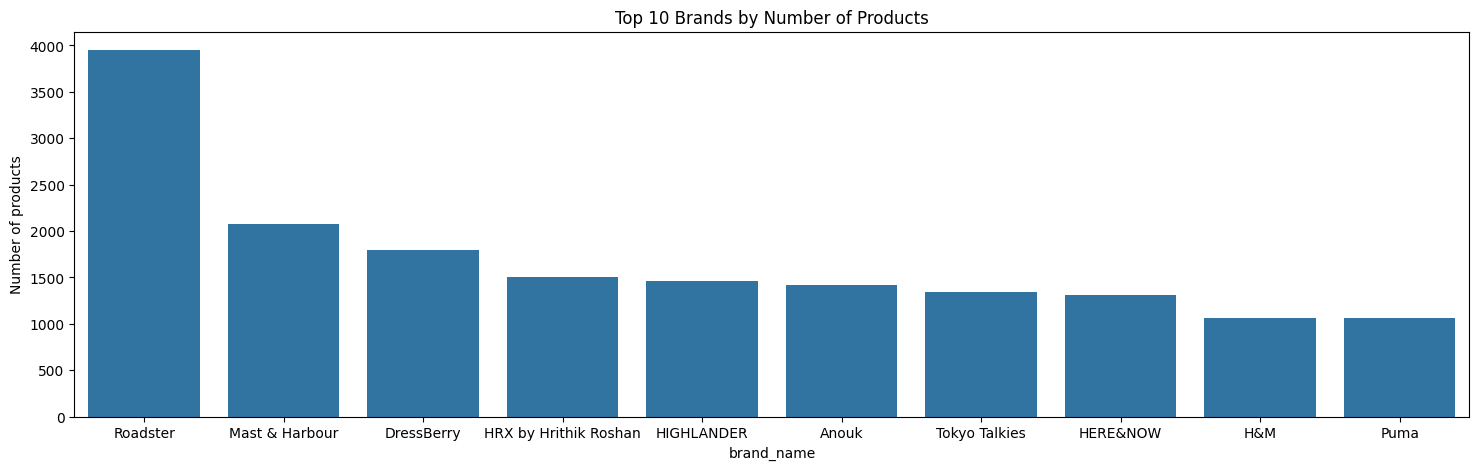

In [16]:
## brand name with most number of product listed
brand_count=myntra_df.groupby('brand_name').size().sort_values(ascending=False)
brand_count
## plotting bar graph for top 10 brand with product listed
top_10_brands = myntra_df['brand_name'].value_counts().head(10).index ## code for top 10 brands
top_10_brands
plt.figure(figsize=(18, 5))
top_brands=sns.countplot(x='brand_name', data=myntra_df, order=top_10_brands)
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('brand_name')
plt.ylabel('Number of products')
top_brands

Text(0, 0.5, 'Number of products')

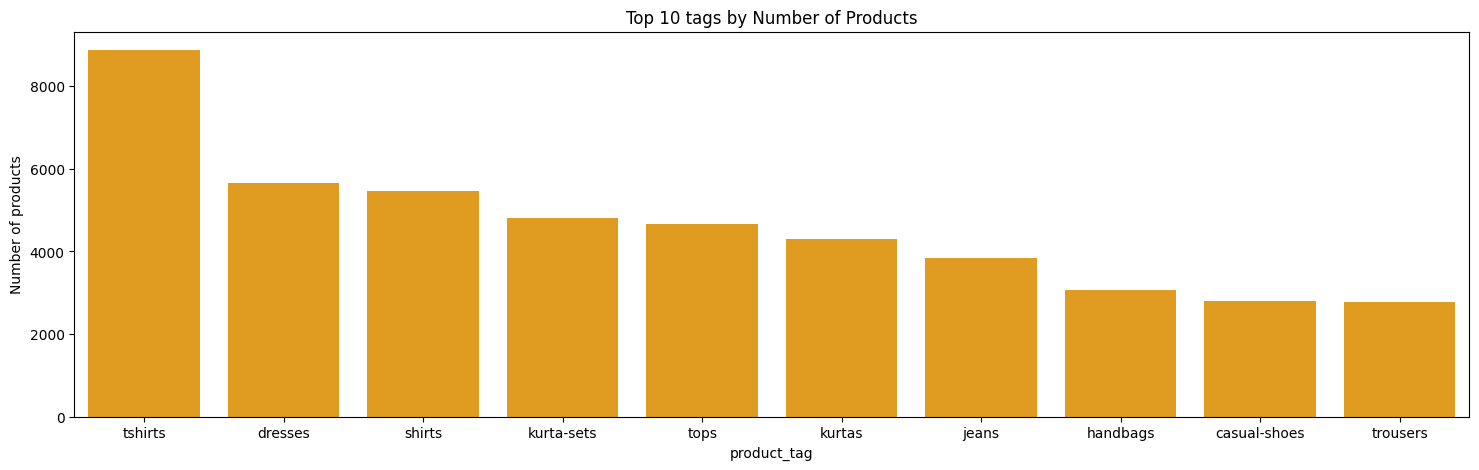

In [134]:
## most common product_tag on myntra
product_tag_count=myntra_df.groupby('product_tag').size().sort_values(ascending=False)
product_tag_count
## top 10 product tags on myntra 
top_product_tag=myntra_df['product_tag'].value_counts().head(10).index ## top product tags
top_product_tag
## plotting the bar graph for above information
plt.figure(figsize=(18, 5))
top_tags=sns.countplot(x='product_tag', data=myntra_df, order=top_product_tag,color='orange')
plt.title('Top 10 tags by Number of Products')
plt.xlabel('product_tag')
plt.ylabel('Number of products')


## Double-Multivariate analysis (2 or more than 2 columns at a time) via plots 


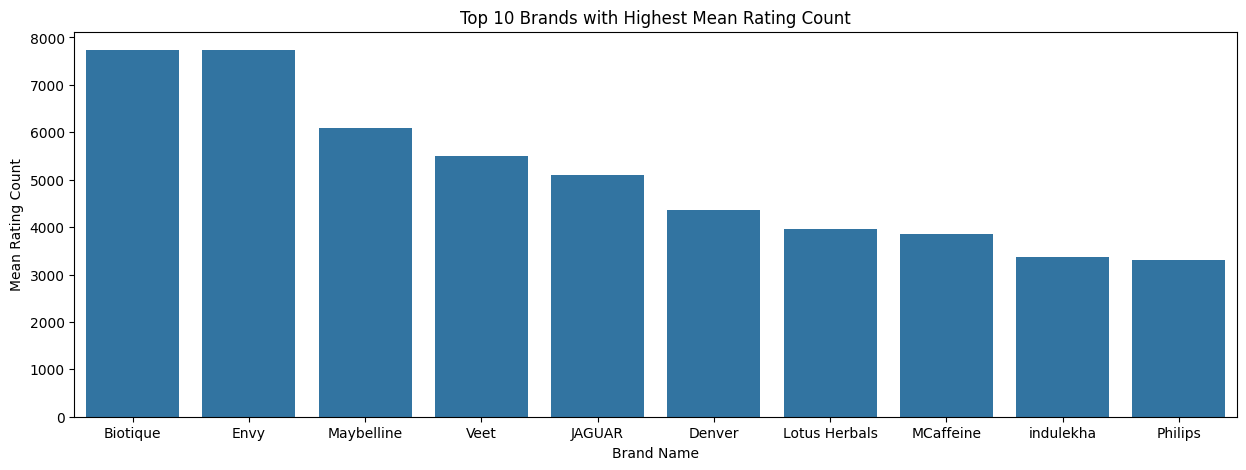

In [19]:
## brand_name with most number of rating count
brand_rating_count=myntra_df.groupby('brand_name')['rating_count'].sum().sort_values(ascending=False)
brand_rating_count
## top 10 brand with high mean rating count
top_brand_rating_count=myntra_df.groupby('brand_name')['rating_count'].mean().sort_values(ascending=False).head(10)
top_brand_rating_count
plt.figure(figsize=(15, 5))
sns.barplot(x=top_brand_rating_count.index, y=top_brand_rating_count.values)
plt.title('Top 10 Brands with Highest Mean Rating Count')
plt.xlabel('Brand Name')
plt.ylabel('Mean Rating Count')
plt.show()

In [20]:
## finding mean rating count of the all brand combine 
brand_rating_count=myntra_df.groupby('brand_name')['rating_count'].sum().sort_values(ascending=False)
total_ratingcount=brand_rating_count.sum()
mean_count=total_ratingcount.sum()/2371
mean_count  ## 8127

np.float64(8126.385491353859)

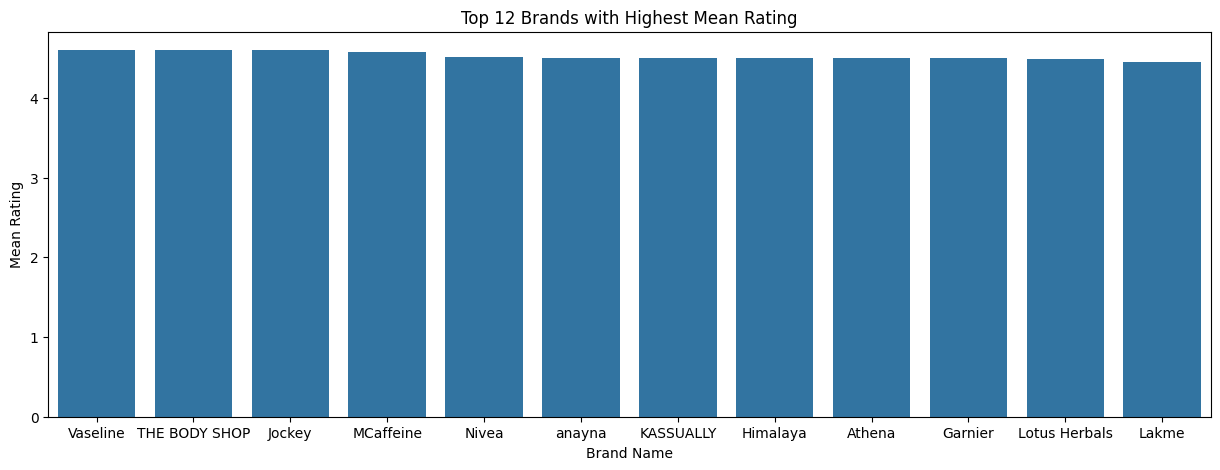

In [21]:
## brand name with avg rating and a minimum rate_count of 8127(mean value)
brand_rating=myntra_df[myntra_df['rating_count']>8127].groupby('brand_name')['rating'].mean().sort_values(ascending=False)
brand_rating
## plotting graph bewteen mean rating top brands
top_brand_rating=myntra_df[myntra_df['rating_count']>8127].groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(12)


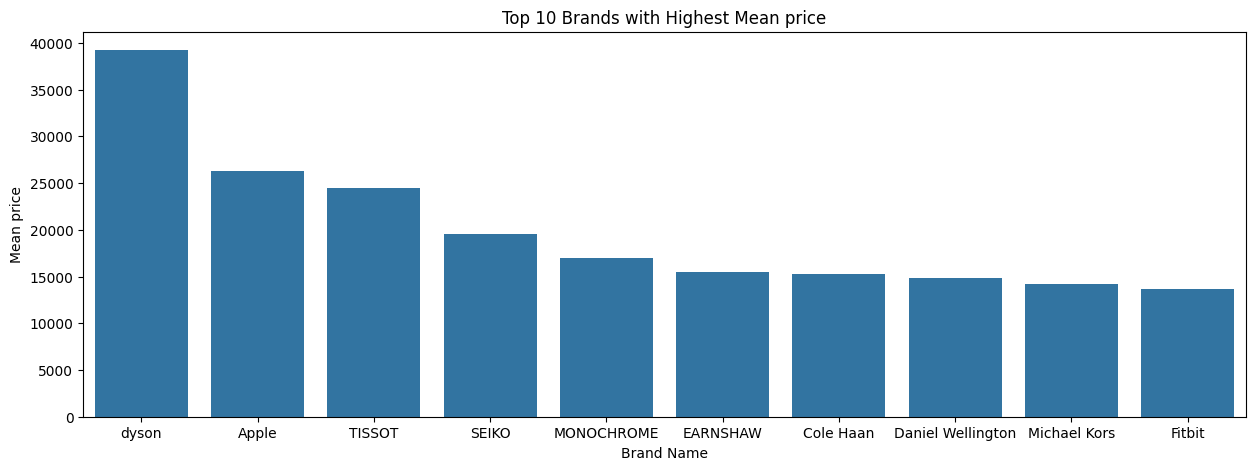

In [47]:
## Most expensive brand listed on myntra wrt discounted price
exp_brand=myntra_df.groupby('brand_name')['discounted_price'].mean().sort_values(ascending=False)
exp_brand
## plotting graph for the same 
expbrand=myntra_df.groupby('brand_name')['discounted_price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x=expbrand.index, y=expbrand.values)
plt.title('Top 10 Brands with Highest Mean price')
plt.xlabel('Brand Name')
plt.ylabel('Mean price')
plt.show()


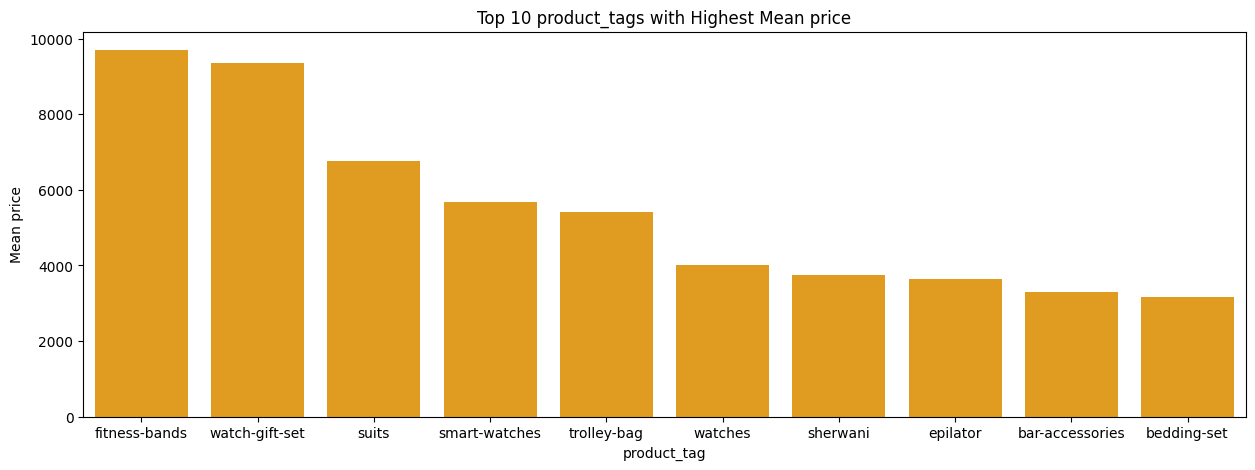

In [112]:
## expensive product_tag 
exp_tag=myntra_df.groupby('product_tag')['discounted_price'].mean().sort_values(ascending=False)
exp_tag
## plotting graph for the same 
exptag=myntra_df.groupby('product_tag')['discounted_price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x=exptag.index, y=exptag.values,color='orange')
plt.title('Top 10 product_tags with Highest Mean price')
plt.xlabel('product_tag')
plt.ylabel('Mean price')
plt.show()

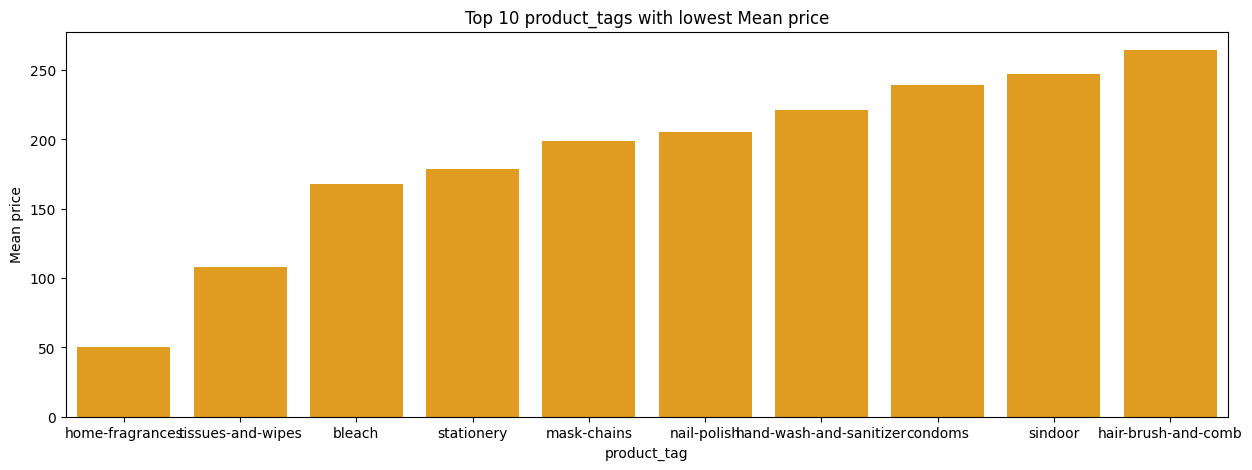

In [110]:
## cheap product_tag 
cheap_tag=myntra_df.groupby('product_tag')['discounted_price'].mean().sort_values()
cheap_tag
## plotting graph for the same 
cheaptag=myntra_df.groupby('product_tag')['discounted_price'].mean().sort_values().head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x=cheaptag.index, y=cheaptag.values,color='orange')
plt.title('Top 10 product_tags with lowest Mean price')
plt.xlabel('product_tag')
plt.ylabel('Mean price')
plt.show()

In [85]:
## Most expensive products on myntra 
top_10_expensive_products = myntra_df.sort_values(by='discounted_price', ascending=False).head(10)
print(top_10_expensive_products[['product_name', 'discounted_price']])
print('-'*100)
## most cheap product on myntra
top_10_cheap_products = myntra_df.sort_values(by='discounted_price', ascending=True).head(10)
print(top_10_cheap_products[['product_name', 'discounted_price']])

                                             product_name  discounted_price
107767                       Airwrap Complete Hair Styler             44900
94269                           Corrale Hair Straightener             38900
1571                                Supersonic Hair Dryer             33900
125478                            Unisex Classic gift set             33198
126901                                Unisex Petite watch             31698
126902                                Unisex Petite watch             31698
1512                 Men Chrono XL Classic Analogue Watch             30000
19072   Men Self-Design Slim-Fit Single-Breasted 3-Pie...             27995
105514                      Unisex AirPods Pro Headset MS             26300
8049                                 Women Watch Gift Set             25297
----------------------------------------------------------------------------------------------------
                          product_name  discounted_price
2672  

## Revenue analysis

C:\Users\tanmai\AppData\Local\Temp\ipykernel_25396\2379552819.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_revenue = myntra_df.groupby('brand_name').apply(lambda x: (x['discounted_price'] * x['rating_count']).sum()).sort_values(ascending=False)
C:\Users\tanmai\AppData\Local\Temp\ipykernel_25396\2379552819.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rev_brand=myntra_df.groupby('brand_nam

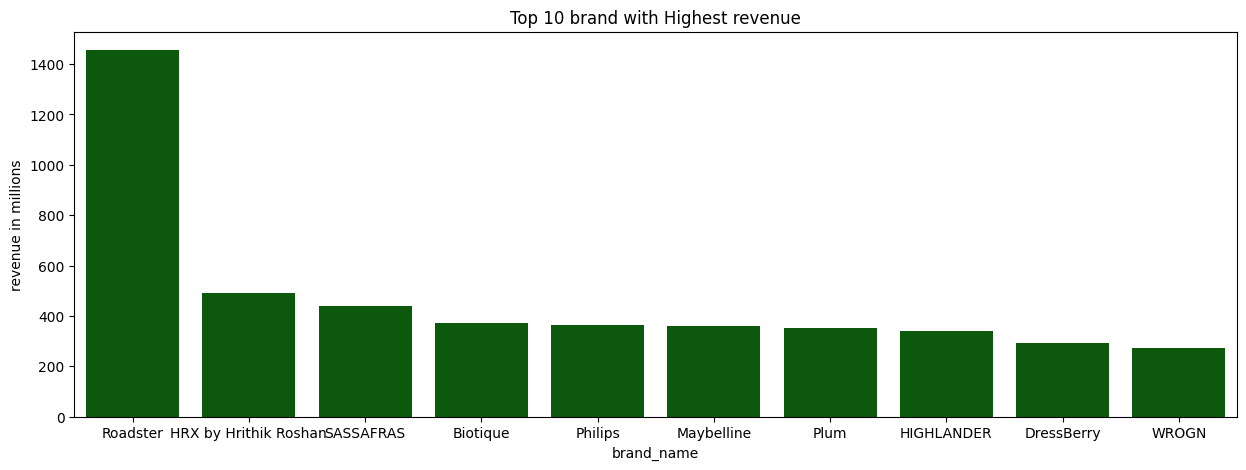

In [136]:
## top brand by revenue
brand_revenue = myntra_df.groupby('brand_name').apply(lambda x: (x['discounted_price'] * x['rating_count']).sum()).sort_values(ascending=False)
brand_revenue
## plotting top 10 brands by revenue 
rev_brand=myntra_df.groupby('brand_name').apply(lambda x: (x['discounted_price'] * x['rating_count']).sum()).sort_values(ascending=False).head(10)
rev_brand_in_millions = rev_brand / 10**6
plt.figure(figsize=(15, 5))
sns.barplot(x=rev_brand_in_millions.index, y=rev_brand_in_millions.values,color='darkgreen')
plt.title('Top 10 brand with Highest revenue')
plt.xlabel('brand_name')
plt.ylabel('revenue in millions')
plt.show()

C:\Users\tanmai\AppData\Local\Temp\ipykernel_25396\993150259.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tag_revenue = myntra_df.groupby('product_tag').apply(lambda x: (x['discounted_price'] * x['rating_count']).sum()).sort_values(ascending=False)
C:\Users\tanmai\AppData\Local\Temp\ipykernel_25396\993150259.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rev_tag=myntra_df.groupby('product_tag').

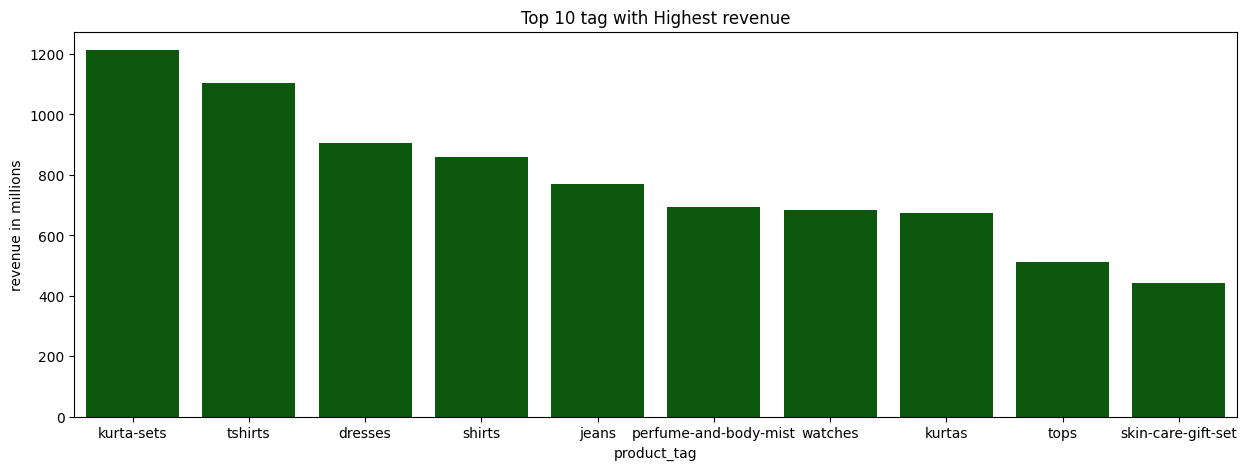

In [154]:
## top tags by revenue
tag_revenue = myntra_df.groupby('product_tag').apply(lambda x: (x['discounted_price'] * x['rating_count']).sum()).sort_values(ascending=False)
tag_revenue
## plotting top 10 brands by revenue 
rev_tag=myntra_df.groupby('product_tag').apply(lambda x: (x['discounted_price'] * x['rating_count']).sum()).sort_values(ascending=False).head(10)
rev_tag_in_millions = rev_tag / 10**6
plt.figure(figsize=(15, 5))
sns.barplot(x=rev_tag_in_millions.index, y=rev_tag_in_millions.values,color='darkgreen')
plt.title('Top 10 tag with Highest revenue')
plt.xlabel('product_tag')
plt.ylabel('revenue in millions')
plt.show()

In [148]:
## total revenue made by myntra
brand_revenue = myntra_df.groupby('brand_name').apply(lambda x: (x['discounted_price'] * x['rating_count']).sum()).sort_values(ascending=False)
total_revenue=brand_revenue.sum()
total_revenue ## 16088699211 total revenue made by myntra

C:\Users\tanmai\AppData\Local\Temp\ipykernel_25396\2491752388.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_revenue = myntra_df.groupby('brand_name').apply(lambda x: (x['discounted_price'] * x['rating_count']).sum()).sort_values(ascending=False)


np.int64(16088699211)

In [160]:
## avg revenue 16088699211/2371

6785617.549978912